<a href="https://colab.research.google.com/github/Julia-321/2048/blob/master/Viz_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils import resample
from umap import UMAP
import matplotlib.pyplot as plt

In [0]:
mnist = fetch_openml('mnist_784')

In [0]:
mnist['s_data'], mnist['s_target'] = resample(mnist['data'], mnist['target'], n_samples=1000)

In [0]:
mnist['pca'] = PCA(n_components=2).fit_transform(mnist.data)

In [0]:
mnist['tsne'] = TSNE(n_components=2).fit_transform(PCA(n_components=50).fit_transform(mnist.s_data))

In [0]:
mnist['umap'] = UMAP(n_components=2).fit_transform(mnist.s_data)

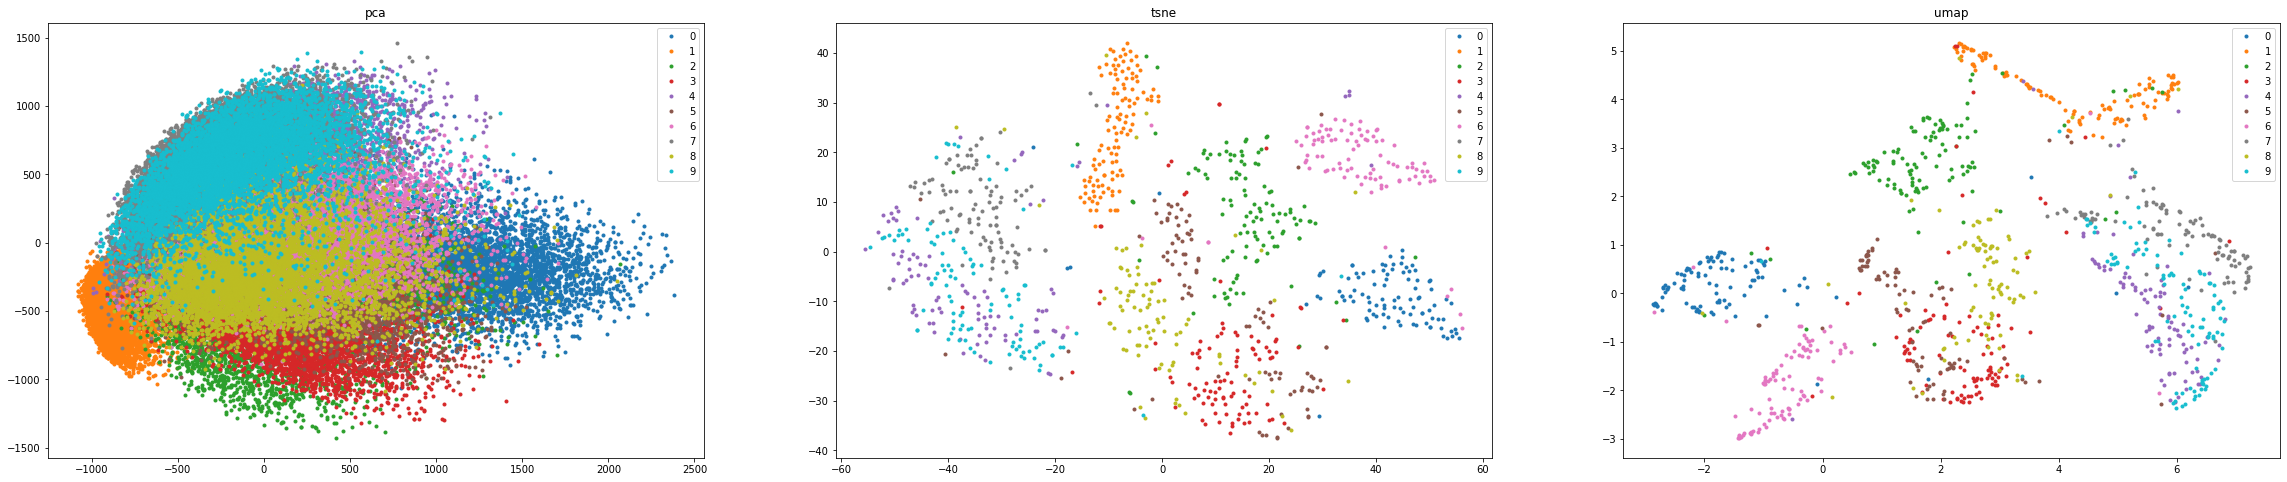

In [22]:
fig = plt.figure(figsize = (40, 8))
axs = fig.subplots(1, 3)
axs[0].set_title('pca')
axs[1].set_title('tsne')
axs[2].set_title('umap')
for t in range(10):
    axs[0].plot(*[mnist['pca'][mnist['target']==str(t), i] for i in range(2)], '.', label=t)
axs[0].legend()
for p in range(1, 3):
  for t in range(10):
    axs[p].plot(*[mnist[axs[p].get_title()][mnist['s_target']==str(t), i] for i in range(2)], '.', label=t)
  axs[p].legend()
